In [1]:
#1.1
# import pandas 
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt
# make plots appear and be stored within the notebook
%matplotlib inline

# 读取csv文件
Sig_Eqs = pd.read_csv("earthquakes-2023-11-04_21-33-00_+0800.tsv",sep='\t',header=0)
# 计算每个国家的总死亡人数
country_death_counts = Sig_Eqs.groupby('Country')['Deaths'].sum().reset_index()
# 按总死亡人数降序排序
country_death_counts = country_death_counts.sort_values(by='Deaths', ascending=False)
# 打印前十名国家以及总死亡人数
top_10_countries = country_death_counts.head(10)
print(top_10_countries)

        Country     Deaths
28        CHINA  2075045.0
140      TURKEY  1188881.0
65         IRAN  1011449.0
69        ITALY   498478.0
131       SYRIA   439224.0
58        HAITI   323478.0
10   AZERBAIJAN   317219.0
71        JAPAN   279085.0
6       ARMENIA   191890.0
102    PAKISTAN   145083.0


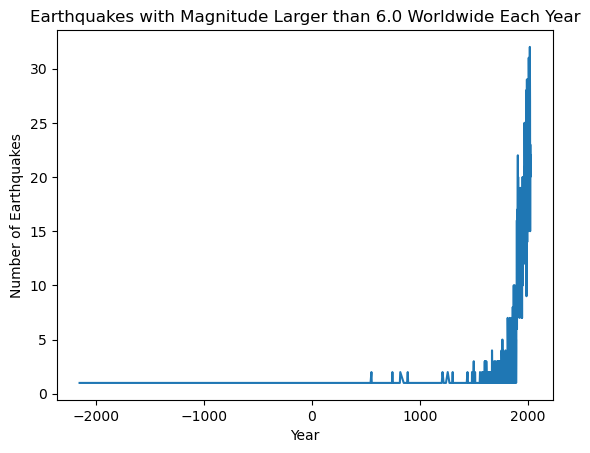

In [2]:
#1.2
# 筛选出震级大于6.0的地震信息
Sig_Eqs_6plus = Sig_Eqs[Sig_Eqs['Mag'] > 6.0]

# 计算每年的地震数
yearly_earthquake_count = Sig_Eqs_6plus.groupby(['Year']).size()

# 绘制时间序列图
plt.plot(yearly_earthquake_count.index, yearly_earthquake_count.values)
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquakes with Magnitude Larger than 6.0 Worldwide Each Year')
plt.show()

In [3]:
#1.3
# 定义函数，计算每个国家的最大地震信息
def CountEq_LargestEq(country, data):
    country_data = data[data['Country'] == country]
    if country_data.empty:
        return country, 0, None
    max_magnitude = country_data['Mag'].max()
    largest_eq = country_data[['Year', 'Mo', 'Dy']][country_data['Mag'] == max_magnitude]
    total_eq_count = len(country_data)
    return country, total_eq_count, largest_eq

# 读取地震数据文件
data = pd.read_csv("earthquakes-2023-11-04_21-33-00_+0800.tsv", sep='\t', header=0)
unique_countries = data['Country'].unique()
results = []

# 遍历每个国家，计算最大地震信息并添加到结果中
for country in unique_countries:
    result = CountEq_LargestEq(country, data)
    results.append(result)

# 根据总地震数对结果进行降序排序
results = sorted(results, key=lambda x: x[1], reverse=True)

# 创建结果的数据框
result_df = pd.DataFrame(results, columns=['Country', 'Total Earthquakes', 'Largest Earthquake Info'])

# 根据总地震数再次排序
result_df = result_df.sort_values(by='Total Earthquakes', ascending=False)

# 打印结果的国家、总地震数和最大地震信息
print(result_df[['Country', 'Total Earthquakes', 'Largest Earthquake Info']])


          Country  Total Earthquakes  \
0           CHINA                620   
1           JAPAN                414   
2       INDONESIA                411   
3            IRAN                384   
4          TURKEY                335   
..            ...                ...   
132       GRENADA                  1   
131        NORWAY                  1   
130  SIERRA LEONE                  1   
129       IRELAND                  1   
156           NaN                  0   

                               Largest Earthquake Info  
0                 Year   Mo    Dy
981  1668  7.0  25.0  
1                Year   Mo    Dy
5742  2011  3.0  11.0  
2              Year    Mo    Dy
5340  2004  12.0  26.0  
3               Year    Mo    Dy
237   856  12.0  22.0  
4          Year    Mo    Dy
3412  1939  12.0  26.0
...  
..                                                 ...  
132  Empty DataFrame
Columns: [Year, Mo, Dy]
Index: []  
131              Year   Mo    Dy
1568  1819  8.0  31.0  
130   

C:\Users\401\AppData\Local\Temp\ipykernel_16228\2433153895.py:2: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2281305.csv')


<Axes: xlabel='YEAR,MONTH'>

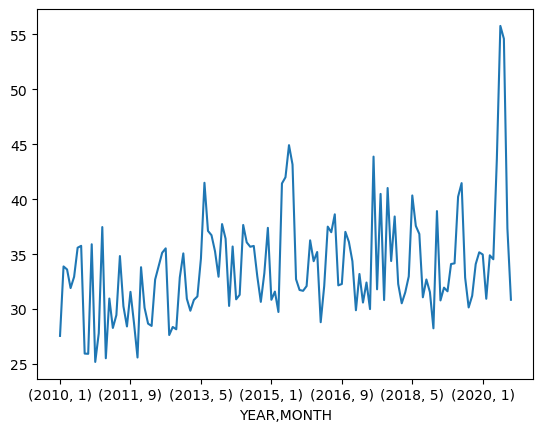

In [48]:
#2
import pandas as pd
df = pd.read_csv('2281305.csv')
df['WS'] = df['WND'].str.split(',', expand=True)[3]
df['YEAR'] = pd.to_datetime(df['DATE']).dt.year
df['MONTH'] = pd.to_datetime(df['DATE']).dt.month
df1 = df[df['WS'] != '9999'].copy()  # 使用.copy()创建副本

df1['WS'] = df1['WS'].astype(float)
df1.groupby(["YEAR", "MONTH"])['WS'].mean().plot()

          观测日期     年   月   日      地下水位观测井代码           样地名称 植被名称  地下水埋深  地面高程
0   2005-01-26  2005   1  26  LCAQX01CDX_01  栾城站气象站地下水位观测井  冬小麦  31.92  50.1
1   2005-01-21  2005   1  21  LCAQX01CDX_01  栾城站气象站地下水位观测井  冬小麦  32.00  50.1
2   2005-01-16  2005   1  16  LCAQX01CDX_01  栾城站气象站地下水位观测井  冬小麦  32.09  50.1
3   2005-01-11  2005   1  11  LCAQX01CDX_01  栾城站气象站地下水位观测井  冬小麦  32.15  50.1
4   2005-01-06  2005   1   6  LCAQX01CDX_01  栾城站气象站地下水位观测井  冬小麦  32.22  50.1
..         ...   ...  ..  ..            ...            ...  ...    ...   ...
787 2014-12-21  2014  12  21  LCAQX01CDX_01  栾城站气象站地下水位观测井  冬小麦  42.65  50.1
788 2014-12-16  2014  12  16  LCAQX01CDX_01  栾城站气象站地下水位观测井  冬小麦  42.73  50.1
789 2014-12-11  2014  12  11  LCAQX01CDX_01  栾城站气象站地下水位观测井  冬小麦  42.90  50.1
790 2014-12-06  2014  12   6  LCAQX01CDX_01  栾城站气象站地下水位观测井  冬小麦  43.07  50.1
791 2014-12-01  2014  12   1  LCAQX01CDX_01  栾城站气象站地下水位观测井  冬小麦  43.15  50.1

[781 rows x 9 columns]


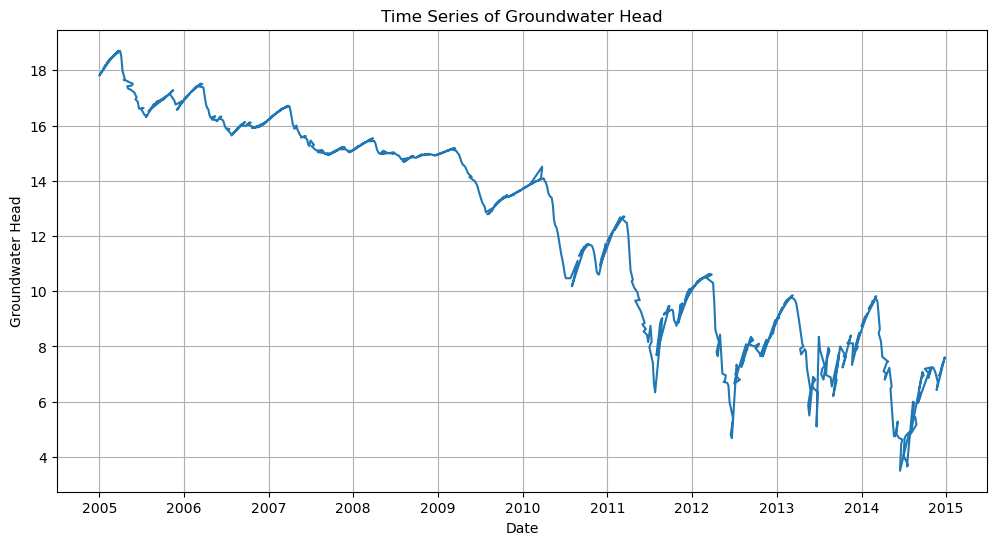

均值: 12.365480153649171
方差: 13.401920955054331
最小值: 3.5
最大值: 18.71
中位数: 13.280000000000001


In [69]:
#3
import pandas as pd
import matplotlib.pyplot as plt

# (1) 加载XLSX文件并清除缺失值或质量差的数据点
file_path = 'DP_ZZL_CERN_DXSW_2005-2014.xlsx'

# 读取Excel文件中的数据
data = pd.read_excel(file_path, sheet_name='LCA')
# 删除包含缺失值的行
data = data.dropna()
print(data)
# 合并年、月、日列为日期列
data['日期'] = pd.to_datetime(data['年'].astype(str) + '-' + data['月'].astype(str) + '-' + data['日'].astype(str), format='%Y-%m-%d')
# 计算地下水位
data['地下水位'] = data['地面高程'] - data['地下水埋深']

# 删除原来的年、月、日列
data = data.drop(['年', '月', '日'], axis=1)

# (2) 计算并绘制地下水位的时间序列图
plt.figure(figsize=(12, 6))
plt.plot(data['日期'], data['地下水位'])
plt.title('Time Series of Groundwater Head')
plt.xlabel('Date')
plt.ylabel('Groundwater Head')
plt.grid(True)
plt.show()

# (3) 计算五个地下水位的空间统计变量
# 计算均值、方差、最小值、最大值、中位数
mean_groundwater_level = data['地下水位'].mean()
variance_groundwater_level = data['地下水位'].var()
min_groundwater_level = data['地下水位'].min()
max_groundwater_level = data['地下水位'].max()
median_groundwater_level = data['地下水位'].median()

print("均值:", mean_groundwater_level)
print("方差:", variance_groundwater_level)
print("最小值:", min_groundwater_level)
print("最大值:", max_groundwater_level)
print("中位数:", median_groundwater_level)